<a href="https://colab.research.google.com/github/ximenasansu/SII/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1. 
 Opción 1 con inciso a) y b)

In [22]:
import random
import math
import statistics

def integral(x):
  return ((math.e**x -1))/(math.e -1)

n = 1000000
suma = []

for i in range(n):
  suma.append(integral(random.random()))

r = statistics.mean(suma)
v = statistics.variance(suma)
print("El valor de la integral es", r)
print("Con varianza", v)

z = []
for i in range(n):
  x = integral(random.random())
  y = integral(1-(random.random()))
  z.append((x+y)/2)

rz = statistics.mean(z)
vz = statistics.variance(z)

print("El valor de la integral es", rz)
print("Con varianza", vz)
print("Con reducción de varinza del", 100*(v-vz)/v, "%")

El valor de la integral es 0.41761914333364053
Con varianza 0.08189434162980098
El valor de la integral es 0.4180545643717024
Con varianza 0.041026349796745284
Con reducción de varinza del 49.903315686689666 %


# Código similar a los apuntes del profesor y gráficas
Opción 2.

No handles with labels found to put in legend.


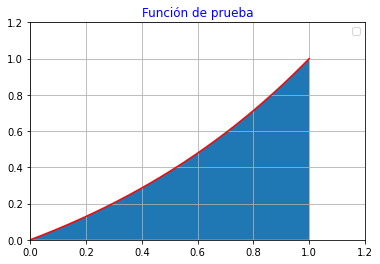

El valor de la integral es: 0.4244655853366653


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

def test_function(x):                    #Definimos la función de prueba.
    return ((math.e**x -1))/(math.e -1)

X=np.linspace(0,1,1000)                 #Graficamos la función de prueba.
plt.plot(X,test_function(X), color='red')
plt.fill_between(X,test_function(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.show()

def integ(func=test_function, n=10000):  #Usando la ley de los grandes números
    muestreo=[]                          #la aproxima como el promedio del muestreo aleatorio
    suma=[]
    for i in range(n):
        u=np.random.random_sample()
        muestreo.append(u)
        y=func(u)
        suma.append(y)

    return(np.mean(suma))

print("El valor de la integral es:", integ())

El valor de la integral es: 0.43074
El error estándar es: 0.009
El valor de la integral es: 0.4178
El error estándar es: 0.00067
El valor de la integral es: 0.41223
El error estándar es: 0.00921
El valor de la integral con v antitéticas es: 0.41828
El error estándar es: 0.00116


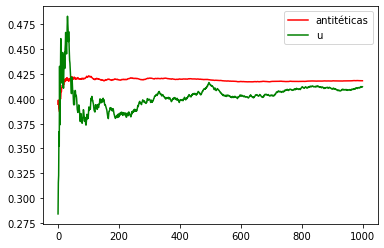

In [37]:
def integ(func=test_function, n=1000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=test_function(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n), suma

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

def integ(func=test_function, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=(test_function(u) + test_function(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

def mc_crudo(test_function, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(test_function(u) + test_function(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral con v antitéticas es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

def mc_crudo1(test_function, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=test_function(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

X1=mc_crudo1(test_function, n=1000)[2]
X=mc_crudo(test_function, n=1000)[2]

plt.plot(X, color='red', label='antitéticas')
plt.plot(X1, color='green', label='u')
plt.legend()